# Lunar Lander Environment

![](https://i.imgur.com/NAg48Qk.gif)

https://www.gymlibrary.dev/environments/box2d/lunar_lander/

In [88]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output
import os

In [89]:
# Directory for saving models
save_dir = "Trained_Agents"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

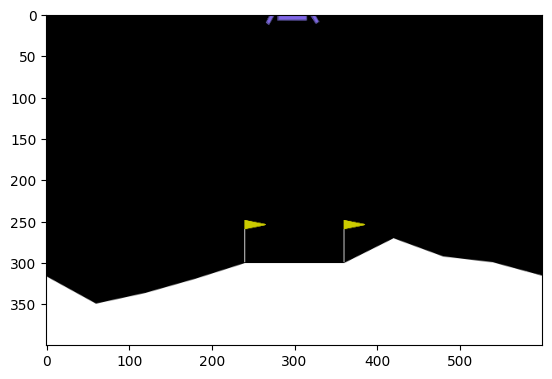

In [90]:
env = gym.make("LunarLander-v2", render_mode='rgb_array')
env_continuous = gym.make("LunarLander-v2", render_mode='rgb_array', continuous=True)
env.reset()
plt.imshow(env.render())
plt.show()

In [91]:
env.metadata

{'render_modes': ['human', 'rgb_array'], 'render_fps': 50}

| Feature Category  | Details                                |
|-------------------|----------------------------------------|
| Action Space      | Discrete(4) or Continuous: Box(-1.0, 1.0, (2,), float32)                          |
| Observation Shape | (8,)                                   |
| Observation High  | [1.5 1.5 5. 5. 3.14 5. 1. 1. ]         |
| Observation Low   | [-1.5 -1.5 -5. -5. -3.14 -5. -0. -0. ] |
| Import            | `gym.make("LunarLander-v2")`           |

This environment is a classic rocket trajectory optimization problem. According to Pontryagin’s maximum principle, it is optimal to fire the engine at full throttle or turn it off. This is the reason why this environment has discrete actions: engine on or off.

There are two environment versions: discrete or continuous. The landing pad is always at coordinates (0,0). The coordinates are the first two numbers in the state vector. Landing outside of the landing pad is possible. Fuel is infinite, so an agent can learn to fly and then land on its first attempt.

### Action Space
There are four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine.

| Action  | Result                          |
|---------|---------------------------------|
| 0       | Do nothing                      |
| 1       | Fire left orientation engine    |
| 2       | Fire main engine                |
| 3       | Fire right orientation engine   |

In [92]:
print(f'Discrete Action Space: {env.action_space}')

Discrete Action Space: Discrete(4)


In [93]:
print(f'Continuous Action Space: {env_continuous.action_space}')

Continuous Action Space: Box(-1.0, 1.0, (2,), float32)


### Observation Space
The state is an 8-dimensional vector: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not.

| Observation  | Value                                   |
|--------------|-----------------------------------------|
| 0            | `x` coordinate (float)                  |
| 1            | `y` coordinate (float)                  |
| 2            | `x` linear velocity (float)             |
| 3            | `y` linear velocity (float)             |
| 4            | Angle in radians from -π to +π (float)  |
| 5            | Angular velocity (float)                |
| 6            | Left leg contact (bool)                 |
| 7            | Right leg contact (bool)                |

In [94]:
random_action = env.action_space.sample()
next_state, reward, done, truncated, info = env.step(random_action)

print(f'Next State: {list(next_state)}')
print(f'Reward: {reward}')
print(f'Done: {done}')      # if True call .reset()
print(f'Truncated: {truncated}')
print(f'Info: {info}')

Next State: [-0.014782238, 1.43213, -0.74281776, 0.4583353, 0.015411948, 0.13608974, 0.0, 0.0]
Reward: 0.40033304620428223
Done: False
Truncated: False
Info: {}


### Rewards
Reward for moving from the top of the screen to the landing pad and coming to rest is about 100-140 points. 
If the lander moves away from the landing pad, it loses reward. 
- If the lander crashes, it receives an additional -100 points. 
- If it comes to rest, it receives an additional +100 points. 
---
- Each leg with ground contact is +10 points. 
- Firing the main engine is -0.3 points each frame. 
- Firing the side engine is -0.03 points each frame. 

Solved is 200 points.

In [95]:
print(f'Reward range: {env.reward_range}')

Reward range: (-inf, inf)


### Starting State
The lander starts at the top center of the viewport with a random initial force applied to its center of mass.

### Episode Termination
The episode finishes if:
- the lander crashes (the lander body gets in contact with the moon);
- the lander gets outside of the viewport (x coordinate is greater than 1);
- the lander is not awake. From the Box2D docs, a body which is not awake is a body which doesn’t move and doesn’t collide with any other body: